# Support Vector Machine Classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm

np.random.seed(409781)

label = "rating_label"

train_df = pd.read_csv("train_final_normalised.csv")
train_X = train_df.loc[:, train_df.columns!=label]
train_y = train_df[label]
test_df = pd.read_csv("test_final_normalised.csv")
test_X = test_df.loc[:, test_df.columns!=label]
test_y = test_df[label]
predict_X = pd.read_csv("predict_final_normalised.csv")

### Model Selection

In [2]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils import resample


X_resampled = resample(train_X, n_samples=3000, random_state=1234)
y_resampled = train_y[X_resampled.index]

possible_hyperparams = {'kernel':('rbf', 'linear', 'poly'), 'C': [5], 'degree': [i for i in range(2,15)]}
SVM_classifier = svm.SVC()

grid_search = RandomizedSearchCV(SVM_classifier, possible_hyperparams, n_iter = 15, random_state=5678, scoring='balanced_accuracy')
grid_search.fit(X_resampled, y_resampled)

RandomizedSearchCV(estimator=SVC(), n_iter=15,
                   param_distributions={'C': [5],
                                        'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14],
                                        'kernel': ('rbf', 'linear', 'poly')},
                   random_state=5678, scoring='balanced_accuracy')

In [3]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_degree,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.769420,2.134213,0.068834,0.010484,linear,4,5,"{'kernel': 'linear', 'degree': 4, 'C': 5}",0.331719,0.333333,0.330105,0.333333,0.333333,0.332365,0.001291,13
1,0.549943,0.013531,0.162435,0.001199,rbf,11,5,"{'kernel': 'rbf', 'degree': 11, 'C': 5}",0.430077,0.411845,0.469837,0.447496,0.418516,0.435554,0.020978,1
2,5.719587,2.043653,0.063921,0.002194,linear,7,5,"{'kernel': 'linear', 'degree': 7, 'C': 5}",0.331719,0.333333,0.330105,0.333333,0.333333,0.332365,0.001291,13
3,0.583430,0.036326,0.080338,0.000984,poly,10,5,"{'kernel': 'poly', 'degree': 10, 'C': 5}",0.367659,0.365454,0.374592,0.373522,0.374394,0.371124,0.003811,10
4,0.543694,0.019396,0.161851,0.001132,rbf,6,5,"{'kernel': 'rbf', 'degree': 6, 'C': 5}",0.430077,0.411845,0.469837,0.447496,0.418516,0.435554,0.020978,1
5,0.552094,0.031316,0.162629,0.001001,rbf,9,5,"{'kernel': 'rbf', 'degree': 9, 'C': 5}",0.430077,0.411845,0.469837,0.447496,0.418516,0.435554,0.020978,1
6,0.545696,0.023624,0.162366,0.001175,rbf,14,5,"{'kernel': 'rbf', 'degree': 14, 'C': 5}",0.430077,0.411845,0.469837,0.447496,0.418516,0.435554,0.020978,1
7,0.526713,0.003085,0.079392,0.000701,poly,5,5,"{'kernel': 'poly', 'degree': 5, 'C': 5}",0.369796,0.371057,0.385867,0.399192,0.384540,0.382090,0.010823,8
8,0.556765,0.030920,0.079318,0.000500,poly,8,5,"{'kernel': 'poly', 'degree': 8, 'C': 5}",0.367659,0.365454,0.374592,0.383938,0.384811,0.375291,0.008011,9
9,0.434954,0.004472,0.069760,0.000708,poly,2,5,"{'kernel': 'poly', 'degree': 2, 'C': 5}",0.431789,0.427538,0.445600,0.422546,0.394102,0.424315,0.016942,6


In [4]:
X_resampled = resample(train_X, n_samples=3000, random_state=9761)
y_resampled = train_y[X_resampled.index]
possible_hyperparams = {'kernel':['rbf'], 'C': [j for j in np.linspace(1, 30, 20)]}
grid_search_two = GridSearchCV(SVM_classifier, possible_hyperparams, scoring=['accuracy','f1_macro'], refit=False)
grid_search_two.fit(X_resampled, y_resampled)
results = pd.DataFrame(grid_search_two.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,std_test_accuracy,rank_test_accuracy,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,split3_test_f1_macro,split4_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro
0,0.456820,0.007876,0.161349,0.001002,1.0,rbf,"{'C': 1.0, 'kernel': 'rbf'}",0.711667,0.713333,0.706667,...,0.003496,3,0.319091,0.323012,0.335836,0.306489,0.306489,0.318183,0.011038,20
1,0.480445,0.004166,0.162897,0.001640,2.526316,rbf,"{'C': 2.526315789473684, 'kernel': 'rbf'}",0.700000,0.731667,0.705000,...,0.012798,1,0.401120,0.464607,0.391179,0.436316,0.392226,0.417090,0.028886,19
2,0.491535,0.007305,0.168925,0.013569,4.052632,rbf,"{'C': 4.052631578947368, 'kernel': 'rbf'}",0.688333,0.743333,0.703333,...,0.018178,2,0.402157,0.497519,0.411677,0.429364,0.414244,0.430992,0.034390,18
3,0.496094,0.005499,0.161250,0.000772,5.578947,rbf,"{'C': 5.578947368421053, 'kernel': 'rbf'}",0.686667,0.715000,0.695000,...,0.011479,4,0.415198,0.476996,0.421181,0.423045,0.421648,0.431614,0.022850,17
4,0.513011,0.035575,0.160653,0.000887,7.105263,rbf,"{'C': 7.105263157894737, 'kernel': 'rbf'}",0.670000,0.710000,0.690000,...,0.013679,5,0.410350,0.480716,0.423917,0.439722,0.417914,0.434524,0.025034,16
5,0.498123,0.003474,0.160557,0.000853,8.631579,rbf,"{'C': 8.631578947368421, 'kernel': 'rbf'}",0.661667,0.710000,0.686667,...,0.016680,6,0.407781,0.481126,0.428793,0.436962,0.422542,0.435441,0.024759,14
6,0.514382,0.022201,0.162244,0.001214,10.157895,rbf,"{'C': 10.157894736842106, 'kernel': 'rbf'}",0.653333,0.706667,0.686667,...,0.018619,9,0.402013,0.476461,0.430374,0.446391,0.424098,0.435868,0.024793,11
7,0.506612,0.004858,0.161471,0.000706,11.684211,rbf,"{'C': 11.68421052631579, 'kernel': 'rbf'}",0.656667,0.708333,0.686667,...,0.018336,7,0.405307,0.478684,0.427318,0.441265,0.432051,0.436925,0.023993,4
8,0.506874,0.004262,0.176860,0.034182,13.210526,rbf,"{'C': 13.210526315789474, 'kernel': 'rbf'}",0.661667,0.710000,0.686667,...,0.016007,8,0.410952,0.480893,0.427318,0.441265,0.426879,0.437461,0.023742,3
9,0.543349,0.018801,0.167019,0.005434,14.736842,rbf,"{'C': 14.73684210526316, 'kernel': 'rbf'}",0.663333,0.701667,0.688333,...,0.012850,11,0.414844,0.476050,0.429792,0.436409,0.424054,0.436230,0.021132,8


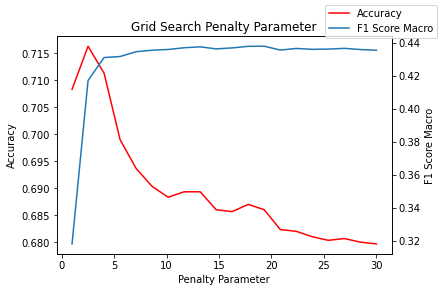

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_title("Grid Search Penalty Parameter")
ax1.plot(results['param_C'], results['mean_test_accuracy'], label = "Accuracy", color = 'red')
ax1.set_xlabel("Penalty Parameter")
ax1.set_ylabel("Accuracy")
ax2 = ax1.twinx()
ax2.plot(results['param_C'], results['mean_test_f1_macro'], label = "F1 Score Macro")
ax2.set_ylabel("F1 Score Macro")
fig.legend()

### SVM Validation

In [6]:
from sklearn import metrics

def report(a, b):
    reports = [
                metrics.accuracy_score(a, b), 
                metrics.precision_score(a, b, average="macro"),
                metrics.recall_score(a, b, average="macro"),
                metrics.f1_score(a, b, average="macro")
               ]
    return reports

In [7]:
# results[results['rank_test_score'] == 1]

In [8]:
SVM_classifier = svm.SVC(kernel='rbf', C=4.05)

In [9]:
SVM_classifier.fit(train_X, train_y)
res = pd.Series(SVM_classifier.predict(test_X))

In [10]:
evaluation_metrics = report(res, test_y)
evaluation_metrics

[0.692391068718838, 0.3794660594818686, 0.6875253415794601, 0.3818969287042923]

In [11]:
train_y.value_counts()

4.0    12966
3.0     4691
5.0      793
Name: rating_label, dtype: int64

### SVM Prediction

In [12]:
res = pd.Series(SVM_classifier.predict(predict_X))
res

0       4.0
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
5761    4.0
5762    3.0
5763    4.0
5764    4.0
5765    4.0
Length: 5766, dtype: float64

In [13]:
csv_file = pd.DataFrame(res, columns=[label])
csv_file.insert(0, "id", res.index + 1)
csv_file

,id,rating_label
0,1,4.0
1,2,4.0
2,3,4.0
3,4,4.0
4,5,4.0
...,...,...
5761,5762,4.0
5762,5763,3.0
5763,5764,4.0
5764,5765,4.0


In [14]:
csv_file.to_csv("svm_output.csv", index=False)